In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('seaborn-notebook')
from matplotlib import gridspec

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss
from sklearn.metrics import confusion_matrix
import random

# Part One: Logistic Regression for Digit Classification

### 1)

In [2]:
x_train = np.loadtxt('data_digits_8_vs_9_noisy/x_train.csv',delimiter=',', skiprows=1)
y_train = np.loadtxt('data_digits_8_vs_9_noisy/y_train.csv',delimiter=',', skiprows=1)
x_test = np.loadtxt('data_digits_8_vs_9_noisy/x_test.csv',delimiter=',', skiprows=1)
y_test = np.loadtxt('data_digits_8_vs_9_noisy/y_test.csv',delimiter=',', skiprows=1)

In [3]:
scores = []
losses = []
first_weights = []
for i in range(1,43):
    model = LogisticRegression(solver='liblinear',max_iter=i)
    model_fit = model.fit(x_train, y_train)
    model_predictions = model_fit.predict_proba(x_train)

    score = model_fit.score(x_train,y_train)
    loss = log_loss(y_train,model_predictions)
    
    scores.append(score)
    losses.append(loss)
    first_weights.append(model.coef_[0][0])

/Users/jacobc/miniconda3/envs/ml135_env/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/jacobc/miniconda3/envs/ml135_env/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/jacobc/miniconda3/envs/ml135_env/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/jacobc/miniconda3/envs/ml135_env/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/jacobc/miniconda3/envs/ml135_env/lib/python3.7/site-packages/sklearn/svm/

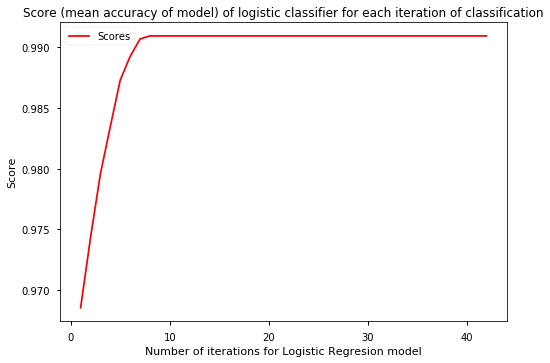

In [4]:
i_list = [x for x in range(1,43)]

xlabel = 'Number of iterations for Logistic Regresion model'
plt.plot(i_list,scores,color='red',label='Scores')
plt.xlabel(xlabel)
plt.ylabel('Score')
plt.legend()
plt.title('Score (mean accuracy of model) of logistic classifier for each iteration of classification')
plt.savefig('#1a.png')

plt.show()

**Discussion**: Here, we see that as the number of maximum iterations allowed for the logistic regression model increases, the mean accuracy of the model (as measured by the model's prediction vs. the training data) increases. At around 10 maximum allowable iterations, the mean accuracy of our model converges to $\approx 0.9909$.

We see this happening because as our model is allowed to update its weights more often, it is more aware of the errors it makes and _has more opportunities to correct them_. The fewer iterations the model is allowed, the less error reduction will take place thorugh the procedure of weight updates. Also, we see a sharp increase in the score of this model for low numbers of maximum iterations. This is because the initial weights for our model are guessed at random, so the first few training data points which are classified/misclassified (i.e. the first few pieces of information gained) are very important to the model's fit. As the number of maximum model iterations grows larger, the model has a classifier that is highly robust to the training data, which is why see the model's score converge on $\approx 0.9909$.

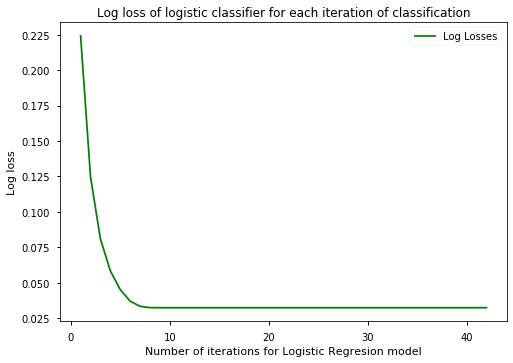

In [5]:
plt.plot(i_list,losses,color='green',label='Log Losses')
plt.xlabel(xlabel)
plt.ylabel('Log loss')
plt.legend()
plt.title('Log loss of logistic classifier for each iteration of classification')
plt.savefig('#1b.png')

plt.show()

**Discussion**: Here, we see the log loss for our model on the training data decreases exponentially for low numbers of maximum iterations, and the converge to $\approx 0.0325$. For similar reasons decribed regarding the score of our model, the log loss decreases exponentially at first as the classifier makes rapid progress in correcting its errors on the training data. The log loss is inversely proportional to the score of our model, which explains why the shape of its 2D plot is inversely proportional to the 2D plot of the model's score.

### 2)

In [6]:
len(model.coef_[0]), len(x_train[0])

(784, 784)

In [7]:
model_fit.coef_[0][0]

-0.4406741022772648

In [8]:
print(first_weights)

[-0.0004907751935018141, -0.009933595857630493, -0.04236516355012585, -0.09004074228377068, -0.12713958543168608, -0.24245956084286807, -0.3695506806926675, -0.4373171568011099, -0.4406741022772648, -0.4406741022772648, -0.4406741022772648, -0.4406741022772648, -0.4406741022772648, -0.4406741022772648, -0.4406741022772648, -0.4406741022772648, -0.4406741022772648, -0.4406741022772648, -0.4406741022772648, -0.4406741022772648, -0.4406741022772648, -0.4406741022772648, -0.4406741022772648, -0.4406741022772648, -0.4406741022772648, -0.4406741022772648, -0.4406741022772648, -0.4406741022772648, -0.4406741022772648, -0.4406741022772648, -0.4406741022772648, -0.4406741022772648, -0.4406741022772648, -0.4406741022772648, -0.4406741022772648, -0.4406741022772648, -0.4406741022772648, -0.4406741022772648, -0.4406741022772648, -0.4406741022772648, -0.4406741022772648, -0.4406741022772648]


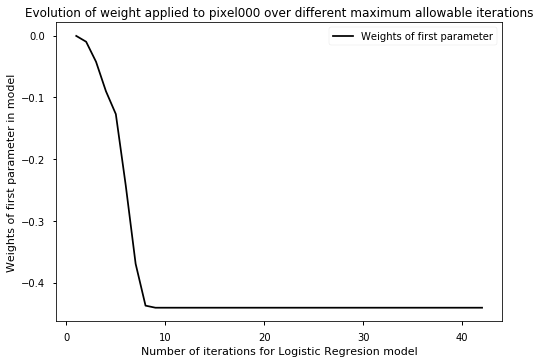

In [9]:
plt.plot(i_list,first_weights,color='black',label='Weights of first parameter')
plt.xlabel(xlabel)
plt.ylabel('Weights of first parameter in model')
plt.title('Evolution of weight applied to pixel000 over different maximum allowable iterations')
plt.legend()
plt.savefig('#2.png')

plt.show()

**Discussion**: Here, we see the evolution of the weight applied to the pixel at the top-left edge of our images, `pixel000`, over different maximum allowable iterations for our logistic classifier. We see that between the $8th-10th$ iterations, the weight for `pixel000` converges to $\approx -0.44067$. This graph clearly shows that the weight of `pixel000` will converge to $\approx -0.4406$. The interesting thing about this graph is the rate at which this first weight updates. Basedon the weight update equation for logistic classification, we know that weights related to misclassified data of higher magnitude will update their faster than weights related to misclassified data of lower magnitude. That is to say, the larger the value of the misclassified data point, the faster the weight will update. For our data, a value of $1$ corresponds to a white pixel and a value of $0$ corresponds to a black pixel. This means that the weight related to `pixel000` is updating based on mostly white pixels from our data.

This pixel lies on the top-left edge of the $28x28$ frame which our data characterizes, so it's reasonable to assume that this pixel is mostly noise. As for why this weight predicts that our image is an $8$, this can be any number of reasons.

### 3)

In [10]:
C_grid = np.logspace(-9, 6, 31)

scores = []
losses = []
predict_class = []
for C_val in C_grid:
    model = LogisticRegression(solver='liblinear',C=C_val)
    model_fit = model.fit(x_train, y_train)
    model_predictions = model_fit.predict_proba(x_test)
    model_predict_class = model_fit.predict(x_test)

    score = model_fit.score(x_test,y_test)
    loss = log_loss(y_test,model_predictions)
    
    scores.append(score)
    losses.append(loss)

In [11]:
min_loss = min(losses)
C_min_loss = C_grid[losses.index(min(losses))]
min_score = scores[losses.index(min(losses))]

print(f"Minimum log loss value on test data: {min_loss}")
print(f"Value for C associated with minimum log loss: {C_min_loss}")
print(f"Accuracy score associated with minimum log loss: {min_score}")

Minimum log loss value on test data: 0.08968955614249495
Value for C associated with minimum log loss: 0.03162277660168379
Accuracy score associated with minimum log loss: 0.9672213817448311


In [12]:
confusion_matrix(y_test, model_predict_class)

array([[923,  51],
       [ 53, 956]])

### 4)

In [13]:
model = LogisticRegression(solver='liblinear',C=C_min_loss)
model_fit = model.fit(x_train, y_train)
model_predictions = model_fit.predict_proba(x_test)
model_predict_class = model_fit.predict(x_test)

score = model_fit.score(x_test,y_test)
loss = log_loss(y_test,model_predictions)

In [14]:
stack = np.column_stack((model_predict_class,y_test))

fp = []
fn = []
for i in range(len(model_predict_class)):
    if model_predict_class[i]==1 and y_test[i]==0:
        fp.append(i)
    if model_predict_class[i]==0 and y_test[i]==1:
        fn.append(i)

fp_9, fn_9 = random.sample(fp, 9), random.sample(fn, 9)

fp_img = [x_test[x].reshape([28,28]) for x in fp_9]
fn_img = [x_test[x].reshape([28,28]) for x in fn_9]

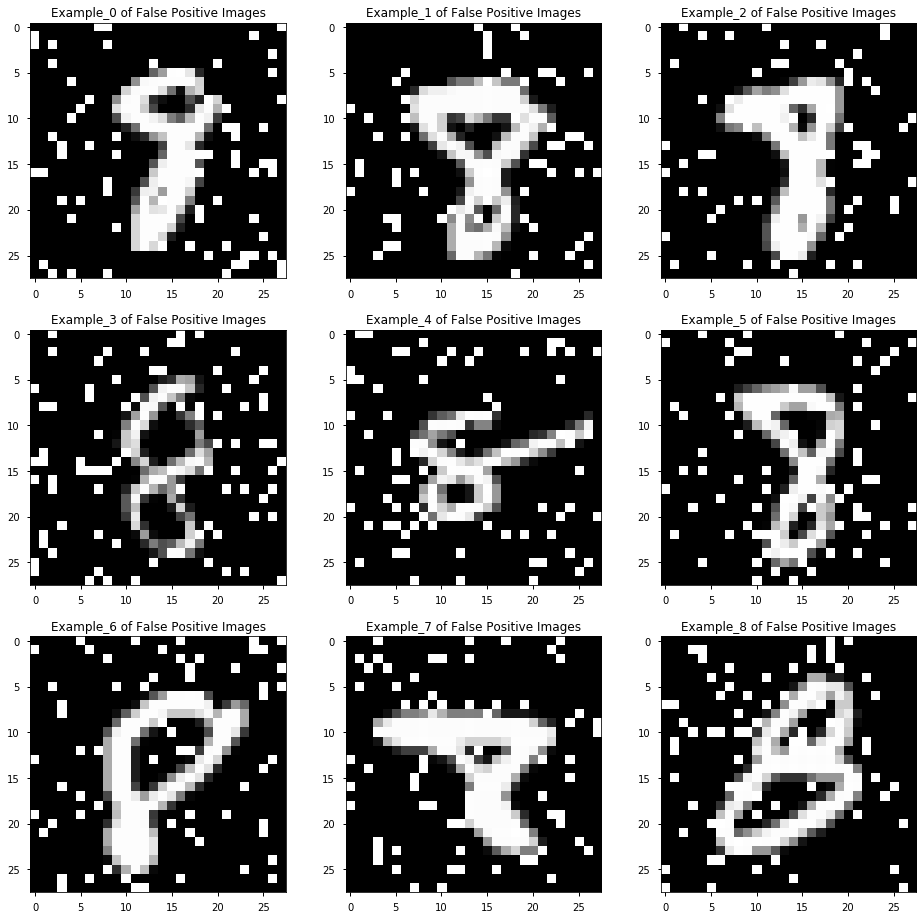

In [15]:
# Plotting the false positive images
fig = plt.figure(figsize = (16,16))
gs = gridspec.GridSpec(3,3)

for i in range(len(fp_img)):
    ax = plt.subplot(gs[i])
    ax.imshow(fp_img[i].reshape([28,28]),cmap='gray',vmin=0.0,vmax=1.0)
    title = 'Example_' + str(i) +' of False Positive Images'
    ax.set_title(title)

# fig.suptitle('9 Examples of False Positive images')
plt.savefig('fp_img_fig.png')
# plt.close()

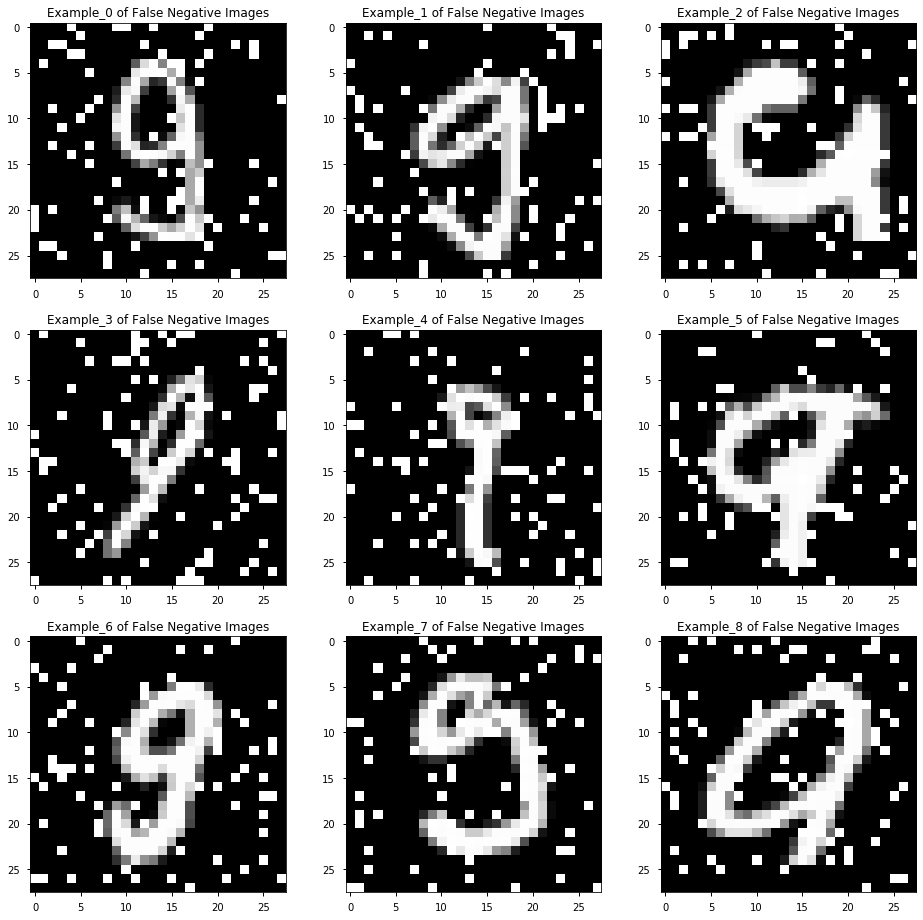

In [16]:
# Plotting the false negative images
fig = plt.figure(figsize = (16,16))
gs = gridspec.GridSpec(3,3)

for i in range(len(fp_img)):
    ax = plt.subplot(gs[i])
    ax.imshow(fn_img[i].reshape([28,28]),cmap='gray',vmin=0.0,vmax=1.0)
    title = 'Example_' + str(i) +' of False Negative Images'
    ax.set_title(title)

# fig.suptitle('9 Examples of False Negative images')
plt.savefig('fn_img_fig.png')
# plt.close()

**Discussion**: Here, we see $9$ examples of _false positive_ and _false negative_ classifications the logistic classifier is making. The false positive images are $8$s classified as $9$s, and the false negative images are $9$s classified as $8$s. Without noise, elements of a $8$ and $9$ character are very similar. The 2 features of these characters which cause these false positive and false negative classifications are 1) the verical narrowness of a $9$ character and 2) the circular and quasi-circular elements of both characters.

Looking at the false positive classifications, these $8$s are extremely (vertically) narrow or are not very bold in the strokes which define them. These are characteristics of a $9$ character, most notably the straight line below the circle and the light stroke of the circle atop said straight line.

Looking at the false negative classifications, these $9$s are extremely bold, and (for the most part) do not have **straight** descending lines below their cirular feature. These 2 features are characteristic of a typical $8$ character, which has a medium stroke strength applied evenly to all parts of the character, and is not as (vertically) narrow as a $9$ character.

Characters of one number share the traits of the other number once a sufficient degree of noise applied to the character's construction, making the unique features of either an $8$ or a $9$ difficult to distinguish.

### 5)

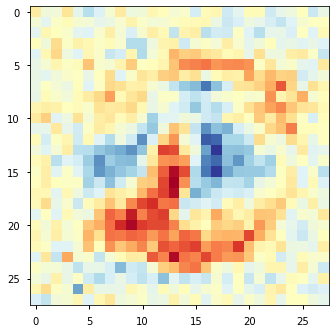

In [17]:
weights = model.coef_

# Plotting the weights
fig = plt.figure()

ax = fig.add_subplot()
ax.imshow(weights[0].reshape([28,28]),cmap='RdYlBu',vmin=-0.5,vmax=0.5)

# fig.suptitle('Weights for model which minimizes log loss out of all models with various inverse regularization strengths')
plt.savefig('weights.png')
# plt.close()

**Discussion**: In the plot above, we see that red pixels, which are associated with negative weights, correspond to the labeling of an $8$, and blue pixels, which are associated with positive weights, correspond to the labeling of a $9$.

For the red pixels (classifying the pixel as an $8$), we see that the pixels associated with $8$ form a quasi-circular pattern around the blue pixels in the middle of the plot. This is the model attempting to extract the connection between 2 circular and intertwining objects which make up the typograph of an $8$. Curiously, the classifier does not construct the full $8$ based on the model's weights, which is due to its attempt to predict a $9$.

A $9$ and $8$ have a similar circular pattern in the top half of their characters, which is one reason the classifier is not predicting the bottom-half of an $8$ with a high degree of certainty. The small southwest-facing jettison of blue pixels emerging from the quasi-linear pattern created by the red pixels is likely the strong downstroke of the top-left part of a $9$ character. In the training data, depictions of the $9$ character varied wildly in terms of their vertical compactness/narrowness and the boldness of character's circular pattern which sits at the top of the character.

We can also see that outside the center of this plot, the classifier does not have strong predictions for either $8$ or $9$. Additionally, within the center of this plot, there are certain areas that are not predicted to be either $8$ or $9$ with a high degree of certainty relative to the predictions around it. This is possibly due to the high degree of variation in character depictions mentioned before: vertical compactness/narrowness, boldness of strokes, compactness of strokes, and overall size of character on the $28\text{x}28$ grid.

In summary, the classifier is failing to make a clear distinction between an $8$ and a $9$ due to their similar circular and quasi-circular pattenrs, but also because of the high level of noise in the training data due to a large degree of variaiton in strokes size, boldness and overall size of characters recorded.

# Part two: Sneakers and Sandals, Logistic Regression from scratch

#### 0 is SNEAKER, 1 is SANDAL

In [328]:
x_train = np.loadtxt('data_sneaker_vs_sandal/x_train.csv',delimiter=',', skiprows=1)
y_train = np.loadtxt('data_sneaker_vs_sandal/y_train.csv',delimiter=',', skiprows=1)
x_test = np.loadtxt('data_sneaker_vs_sandal/x_test.csv',delimiter=',', skiprows=1)
# NO y_test DATA - THAT IS ON GRADESCOPE FOR TESTING

In [329]:
len(x_train), len(y_train)

(12000, 12000)

0.0
8683


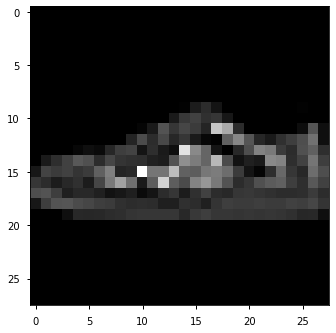

In [330]:
i = random.randrange(0,len(x_train))

plt.imshow(x_train[i].reshape([28,28]),cmap='gray',vmin=0.0,vmax=1.0)
print(y_train[i])
print(i)
plt.savefig('test.png')

In [331]:
ss = LogisticRegression(solver='liblinear')

In [332]:
# First pass

ss_fit = ss.fit(x_train, y_train)
# Results: error=0.04249999999999998, AUROC = 0.993241

Nothing happened.

In [333]:
# Squaring each feature

x_train_sq = np.square(x_train)
ss_sq_fit = ss.fit(x_train_sq, y_train)

# Results: error=0.046499999999999986, AUROC = 0.993897

Feature transformation did not prove more accurate or robust than standard classifier. Squaring features does not change anything. Must find a way to focus classifier in on important spatial features.

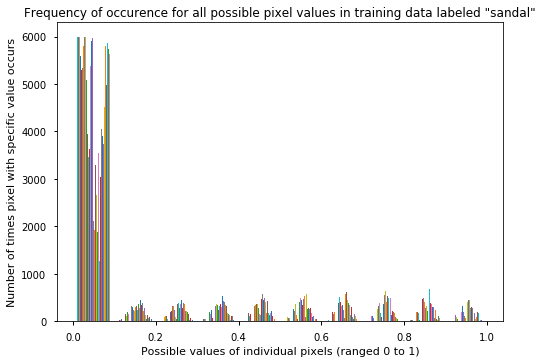

In [420]:
# Sanadals are always vertical, and sneakers are never horizontal
# Histograms

# sneakers
a = x_train[y_train==0]

# sandals
b = x_train[y_train==1]

plt.hist(b)
plt.xlabel('Possible values of individual pixels (ranged 0 to 1)')
plt.ylabel('Number of times pixel with specific value occurs')
plt.title('Frequency of occurence for all possible pixel values in training data labeled "sandal"')
plt.savefig('hist_sandals.png')
plt.show()

Not so interesting. Black pixels have more weight. But this is counts for values of pixles from 0-1. What if we sum the value of all pixels, and then plot out the sum of each index?

However, this sinusoidal pattern is __very interesting__.

In [335]:
# head
np.sum(x_train,axis=0)[0:10]

array([0.     , 0.051  , 0.051  , 0.0824 , 0.14514, 0.14122, 0.16082,
       0.18832, 0.69822, 1.14938])

In [336]:
p_list = [x for x in range(784)]

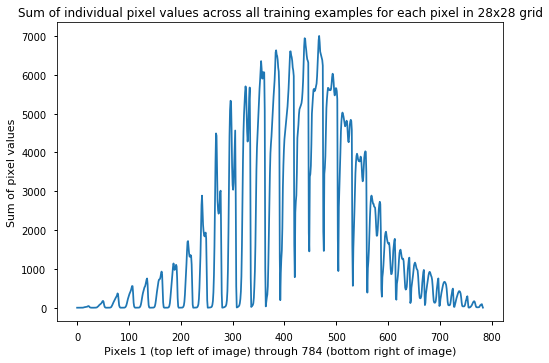

In [370]:
plt.plot(p_list,np.sum(x_train,axis=0))
plt.xlabel('Pixels 1 (top left of image) through 784 (bottom right of image)')
plt.ylabel('Sum of pixel values')
plt.title('Sum of individual pixel values across all training examples for each pixel in 28x28 grid')
plt.savefig('sumhist.png')
plt.show()

Again, **another interesting pattern**. Sinusoidal pattern, as before, but we can see a trend (and a seasonality, if we were using time-series econometrics).

In [338]:
# For every 7th column of the image, SQUARE THE FEATURES

x_train_col = x_train.copy()

for i in range(0,28,7):
    x_train_col[:,i] = np.square(x_train[:,i])
    
ss_col = ss.fit(x_train_col,y_train)

# Results: same as baseline

In [339]:
# # Appended

# x2 = np.vstack([x_train,x_train_col])
# y2 = np.append(y_train,y_train.copy())
# ss_col2 = ss.fit(x2,y2)

# Results: error=0.04249999999999998, AUROC=0.993241

Trying the below idea, use the above graph.

In [340]:
# NOW, raise each column to the power of it's sum

x_train_power = x_train.copy()

sums = np.sum(x_train,axis=0)
for i in range(np.size(x_train,1)):
    x_train_power[:,i] = np.power(x_train[:,i],sums[i])

    
ss_power = ss.fit(x_train_power,y_train)
# Results: error=0.17900000000000005, AUROC=0.93781

In [341]:
# Combined og & power datasetes

x2 = np.vstack([x_train,x_train_power])
ss_power = ss.fit(x2,y2)

# Results: error=0.04349999999999998, AUROC=0.992329

Error and AUROC are ABSOLUTELY terrible (power set alone). This transformation provides absolutely no information whatsoever. Terrible metrics. Shows that each pixel to the power of their sums (by column) does not help the classifier. This transformation actually **_introduces noise_** to our dataset.

In [342]:
# Quick idea
# Rotate dataset 90° to the left
x_train_rot = x_train.copy()

for i in range(len(x_train)):
    a = x_train[i].reshape([28,28])
    b = np.rot90(a)
    c = b.flatten()
    x_train_rot[i] = c

new = np.vstack([x_train,x_train_rot])
y2 = np.append(y_train,y_train.copy())

ss_rot = ss.fit(new,y2)
# Results: error=0.049000000000000044, AUROC=0.9882230000000001

Here, we can see that spatial features of the data might be of interest for exploration. So, the following transformations explore this concept.

In [343]:
# NEW TRICK - for every pixel, sum the values of pixels diagonally down and to the left.
# IDEA: blank diagonal circles & diagonal lines in sandals

x_train_diag = x_train.copy()

In [344]:
a = [x for x in range(9)]
m = np.array(a)
m2 = m.reshape([3,3])

In [345]:
for i in range(np.size(m2,0)):
    for j in range(np.size(m2,1)):
        print(np.diagonal(np.fliplr(m2[i:len(m2)]),offset=j))

[2 4 6]
[1 3]
[0]
[5 7]
[4 6]
[3]
[8]
[7]
[6]


In [346]:
m3 = np.empty([3,3])
flip = np.flip(m2,1)
for i in range(np.size(m2,0)):
    for j in range(np.size(m2,1)):
        m3[i][-(j+1)] = flip[i:len(flip)].trace(offset=j)

In [347]:
print(m2)
print(m3)

[[0 1 2]
 [3 4 5]
 [6 7 8]]
[[ 0.  4. 12.]
 [ 3. 10. 12.]
 [ 6.  7.  8.]]


In [427]:
# Diagonal (sum) training features ALONE

for a in range(len(x_train_diag)):
    m = x_train_diag[a].reshape([28,28])
    n = np.empty([28,28])
    flip = np.flip(m,1)
    for i in range(np.size(m,0)):
        for j in range(np.size(m,1)):
            n[i][-(j+1)] = flip[i:len(flip)].trace(offset=j)
    x_train_diag[a] = n.flatten()

ss = LogisticRegression(solver='liblinear')
ss_diag = ss.fit(x_train_diag,y_train)
# # Results: error=0.49950000000000006, AUROC = 0.72513

In [428]:
# Confusion matrix

confusion_matrix(y_train,ss_diag.predict(x_train))

array([[  28, 5972],
       [ 924, 5076]])

In [349]:
# # Together
# x2 = np.vstack([x_train,x_train_diag])
# y2 = np.append(y_train,y_train.copy())

# ss_diag2 = ss.fit(x2,y2)

# # Results: error=0.16100000000000003, 0.9279440000000001

Very bad results. AUROC is not terrible, which means that our false positive rate is not that bad, but our error is absolutely terrible.

**NOTE** the failure of convergence. This is probably due to the high degree of similarity between sneakers and sandals in the diagonal feature set, so the classifier cannot distinguish between the classes, making this feature transformation a poor choice.

**WHEN EXPLAINING THIS IDEA in your report**, pick out some random images and show the triangles that appear for sneakers vs sandals (this was the motivation for the technique). Now, add features capturing the input of these triangles.

In [350]:
l = np.array([[0,1,2,3,4,5],[3,4,5,6,4,4],[6,7,8,9,4,3],[9,10,11,12,4,2],[9,3,6,1,5,1],[1,2,3,4,5,6]])
print(l)
print(np.shape(l))

[[ 0  1  2  3  4  5]
 [ 3  4  5  6  4  4]
 [ 6  7  8  9  4  3]
 [ 9 10 11 12  4  2]
 [ 9  3  6  1  5  1]
 [ 1  2  3  4  5  6]]
(6, 6)


In [351]:
size = np.shape(l)[0]
q = 2
# size MUST BE DIVISIBLE BY q

for j in range(q,np.size(l,1)+1,q):
    for i in range(0,len(l)-(q-1),q):
        print(l[j-q:j,i:i+q])
        print(np.fliplr(np.tril(np.fliplr(l[j-q:j,i:i+q]))))
        print(np.sum(np.fliplr(np.tril(np.fliplr(l[j-q:j,i:i+q])))))
#     keep original in mind

[[0 1]
 [3 4]]
[[0 1]
 [3 4]]
8
[[2 3]
 [5 6]]
[[0 3]
 [5 6]]
14
[[4 5]
 [4 4]]
[[0 5]
 [4 4]]
13
[[ 6  7]
 [ 9 10]]
[[ 0  7]
 [ 9 10]]
26
[[ 8  9]
 [11 12]]
[[ 0  9]
 [11 12]]
32
[[4 3]
 [4 2]]
[[0 3]
 [4 2]]
9
[[9 3]
 [1 2]]
[[0 3]
 [1 2]]
6
[[6 1]
 [3 4]]
[[0 1]
 [3 4]]
8
[[5 1]
 [5 6]]
[[0 1]
 [5 6]]
12


In [429]:
# TRIANGLE EXTRACTION METHOD
# transform training set
size = 28
q=7

l = []
for x in range(len(x_train)):
    m = x_train[x].reshape([28,28])
    b = []
    for j in range(q,np.size(m,1)+1,q):
        for i in range(0,len(m)-(q-1),q):
            b.append(np.sum(np.fliplr(np.tril(np.fliplr(m[j-q:j,i:i+q])))))
    l.append(np.append(m,b))

x_train_add = l.copy()

# transform test set

l = []
for x in range(len(x_test)):
    m = x_test[x].reshape([28,28])
    b = []
    for j in range(q,np.size(m,1)+1,q):
        for i in range(0,len(m)-(q-1),q):
            b.append(np.sum(np.fliplr(np.tril(np.fliplr(m[j-q:j,i:i+q])))))
    l.append(np.append(m,b))

x_test_add = l.copy()

ss = LogisticRegression(solver='liblinear')
ss_add = ss.fit(x_train_add,y_train)
# Results: error=0.04300000000000004, AUROC=0.993161
# No C exploration

In [430]:
confusion_matrix(y_train,ss_add.predict(x_train_add))

array([[5861,  139],
       [ 173, 5827]])

In [431]:
# Built above model, exploring C_grid and then giving the minimum error
C_grid = np.logspace(-9,1,31)
grid = np.array_split(C_grid,3)


losses = []
for c_val in C_grid:
    ss = LogisticRegression(solver='liblinear',C=c_val)
    ss_fit = ss.fit(x_train_add,y_train)
    ss_predict = ss_fit.predict_proba(x_train_add)
    
    loss = log_loss(y_train,ss_predict)
    losses.append(loss)

min_loss = min(losses)
min_c = C_grid[losses.index(min_loss)]

print(min_loss)
print(min_c)
print(losses.index(min_loss),len(losses))

ss = LogisticRegression(solver='liblinear',C=min_c)
ss_add_c = ss.fit(x_train_add,y_train)

# Results (with C exploration): error=0.046499999999999986, AUROC=0.9901610000000001

0.06744154985874945
10.0
30 31


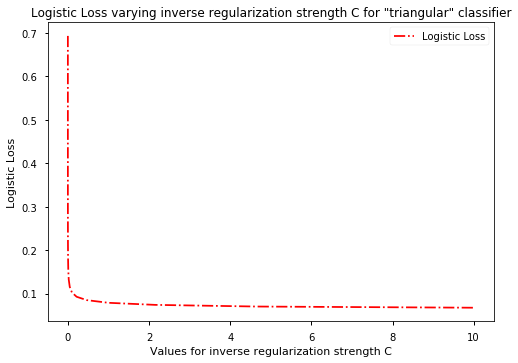

In [416]:
# MANDATORY PLOT 1

plt.plot(C_grid,losses,'-.r',label='Logistic Loss')
plt.xlabel('Values for inverse regularization strength C')
plt.ylabel('Logistic Loss')
plt.legend()
plt.title('Logistic Loss varying inverse regularization strength C for "triangular" classifier')
plt.savefig('tri_c.png')

plt.show()

The diagonalization features with the summation of their inverse triangular grids in $16$ $7x7$ does not do much worse than our standard logistic regression classifier with no feature trasformations.

In [355]:
# NEXT IDEA: Combine the ideas of diagonal summation and the traingular summation.
# Take a 7x7 grid, calculate it's center, and sum the pixels on all 4 diagonals
# from the center to the edge of the grid. (so basically an "x"/cross)

In [356]:
l = np.array([[0,1,4,6],[3,2,7,3],[6,9,5,9],[4,7,8,4]])
l

array([[0, 1, 4, 6],
       [3, 2, 7, 3],
       [6, 9, 5, 9],
       [4, 7, 8, 4]])

In [357]:
q = 5
f = np.floor(q/2)
f

2.0

In [435]:
# Re-run for different values of q

q = 7
f = int(np.floor(q/2))


l = []
for x in range(len(x_train)):
    m = x_train[x].reshape([28,28])
    b = []
    for j in range(q,np.size(m,1)+1,q):
        for i in range(0,len(m)-(q-1),q):
            mat = m[j-q:j,i:i+q]
            x = np.trace(mat)
            y = np.trace(np.fliplr(mat))
            b.append(np.sum([x,y])-mat[f,f])
    l.append(np.append(m,b))

x_train_cross = l.copy()

# transform test set

l = []
for x in range(len(x_test)):
    m = x_test[x].reshape([28,28])
    b = []
    for j in range(q,np.size(m,1)+1,q):
        for i in range(0,len(m)-(q-1),q):
            x = np.trace(m[j-q:j,i:i+q])
            y = np.trace(np.fliplr(m[j-q:j,i:i+q]))
            b.append(sum([x,y])-m[f,f])
    l.append(np.append(m,b))

x_test_cross = l.copy()

ss = LogisticRegression(solver='liblinear')
ss_cross = ss.fit(x_train_cross,y_train)

In [436]:
# RESULTS

# 4
# error= 0.04400000000000004, AUROC=0.9929600000000001

# 7
# error=0.04049999999999998, AUROC=0.993166

# 14
# error=0.04149999999999998, AUROC=0.993214

In [437]:
# Best error is 7
# Search for best C

C_grid = np.logspace(-9,1,31)

losses = []
for c_val in C_grid:
    ss = LogisticRegression(solver='liblinear',C=c_val)
    ss_fit = ss.fit(x_train_cross,y_train)
    ss_predict = ss_fit.predict_proba(x_train_cross)
    
    loss = log_loss(y_train,ss_predict)
    losses.append(loss)

min_loss = min(losses)
min_c = C_grid[losses.index(min_loss)]

print(min_loss)
print(min_c)
print(losses.index(min_loss),len(losses))

ss = LogisticRegression(solver='liblinear',C=min_c)
ss_cross_c = ss.fit(x_train_cross,y_train)

# Results (with C exploration): error=0.04700000000000004, AUROC=0.9906110000000001

0.0672590174400135
10.0
30 31


In [439]:
confusion_matrix(y_train,ss_cross.predict(x_train_cross))

array([[5860,  140],
       [ 177, 5823]])

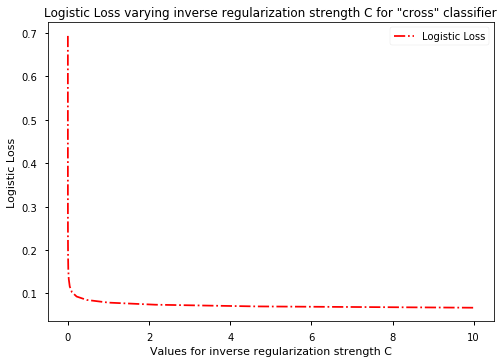

In [419]:
plt.plot(C_grid,losses,'-.r',label='Logistic Loss')
plt.xlabel('Values for inverse regularization strength C')
plt.ylabel('Logistic Loss')
plt.legend()
plt.title('Logistic Loss varying inverse regularization strength C for "cross" classifier')
plt.savefig('cross_c.png')

plt.show()

In [422]:
# MANDATORY PLOT 2: error and AUROC for each of the paramaters aforementioned (sizes 4,7,14)

cross_num = [4,7,14]
errors = [0.0440,0.04049,0.04149]
curve_list = [0.99296,0.993166,0.993214]

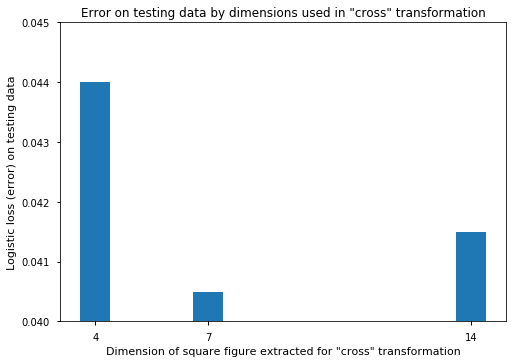

In [423]:
plt.ylim(0.04,0.045)
plt.bar(cross_num,errors)
plt.xticks(cross_num)
plt.xlabel('Dimension of square figure extracted for "cross" transformation')
plt.ylabel('Logistic loss (error) on testing data')
plt.title('Error on testing data by dimensions used in "cross" transformation')
plt.savefig('crosserror.png')

plt.show()

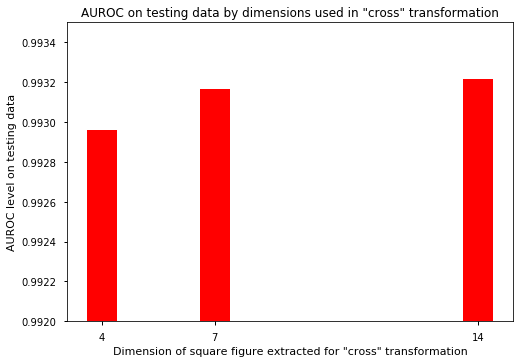

In [424]:
plt.ylim(0.992,0.9935)
plt.bar(cross_num,curve_list,color='r')
plt.xticks(cross_num)
plt.xlabel('Dimension of square figure extracted for "cross" transformation')
plt.ylabel('AUROC level on testing data')
plt.title('AUROC on testing data by dimensions used in "cross" transformation')
plt.savefig('crossauroc.png')

plt.show()

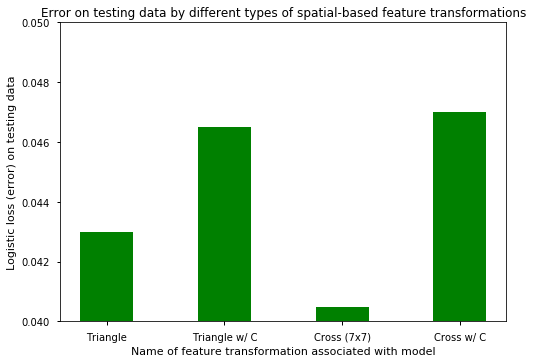

In [440]:
# (optional) PLOT 3: error and AUROC for all spaital-based methods
# (for cross method, choose model with lowest error)

mthd = ['Triangle', 'Triangle w/ C', 'Cross (7x7)', 'Cross w/ C']
m_errors = [0.0430,0.04649,0.04049,0.0470]

plt.bar(mthd,m_errors, color='g',width = 0.45)
plt.xlabel('Name of feature transformation associated with model')
plt.ylabel('Logistic loss (error) on testing data')
plt.title('Error on testing data by different types of spatial-based feature transformations')
plt.xticks(mthd)
plt.ylim(0.04,0.05)
plt.savefig('mthd_error.png')

plt.show()

# diag error=0.4995

In [368]:
## SAVE DATA FOR SCORING
# *** TEST DATA MUST BE SIZE 2000 (same as size of y_test on the autograder)
# HOWEVER it can have more features.
# INSERT YOUR MODEL BELOW vvvv

yproba1_test = ss_cross.predict_proba(x_test_cross)[:, 1] # this is the column looking at if __class-label__==1
np.savetxt('yproba1_test.txt', yproba1_test)